<a href="https://colab.research.google.com/github/arelies-proximo/ML-Projects/blob/main/ML-Projects/Linear%20Regression%20Project/Linear_Regression_Salary_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LINEAR REGRESSION

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [9]:
df = pd.read_csv('Salary_Data.csv')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [11]:
df

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [15]:
#x contains salary (independent var) to predict
# y contains years (dependent variable), the target

X = df.iloc[:, :-1].values
  #all rows, last column (2nd column)

Y = df.iloc[:, 1].values

<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

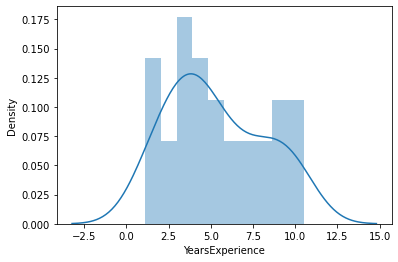

In [38]:
sns.distplot(df['YearsExperience'], bins=10, )

More employee are in 3-4 years experienced

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

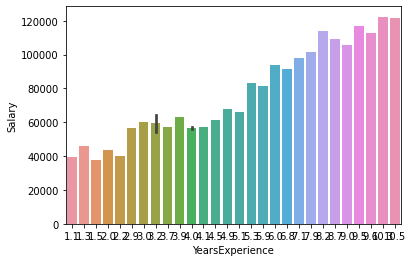

In [14]:
sns.barplot(x= 'YearsExperience', y='Salary', data= df)
  #YearsExperience and 'Salary' are the name of the columns

TypeError: ignored

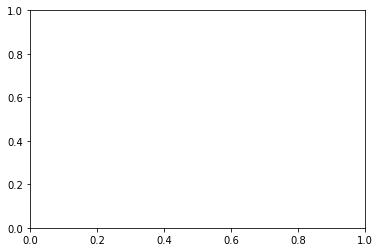

In [21]:
plt.bar(X,Y)

In [17]:
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [19]:
X[:,0]

array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.2,  3.7,  3.9,
        4. ,  4. ,  4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,
        7.9,  8.2,  8.7,  9. ,  9.5,  9.6, 10.3, 10.5])

In [20]:
Y

array([ 39343,  46205,  37731,  43525,  39891,  56642,  60150,  54445,
        64445,  57189,  63218,  55794,  56957,  57081,  61111,  67938,
        66029,  83088,  81363,  93940,  91738,  98273, 101302, 113812,
       109431, 105582, 116969, 112635, 122391, 121872])

<BarContainer object of 30 artists>

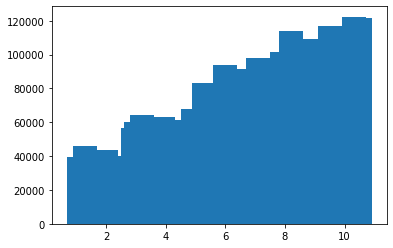

In [22]:
plt.bar(X[:,0], Y)

Splitting the Training n Testing Data

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 1/3, random_state=0)

Create a Model


In [25]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

Train the Model

**Fitting the Training set**

In [26]:
lr.fit(x_train, y_train)

LinearRegression()

In [27]:
y_pred = lr.predict(x_test)
y_pred

array([ 40835.10590871, 123079.39940819,  65134.55626083,  63265.36777221,
       115602.64545369, 108125.8914992 , 116537.23969801,  64199.96201652,
        76349.68719258, 100649.1375447 ])

In [28]:
y_test

array([ 37731, 122391,  57081,  63218, 116969, 109431, 112635,  55794,
        83088, 101302])

Plot of Training data

Original Output and Prediction output

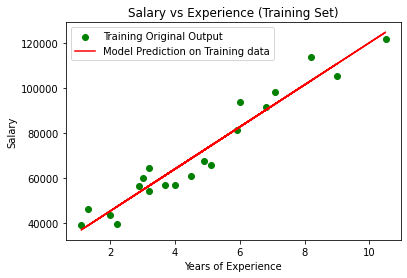

In [33]:
plt.scatter(x_train, y_train, color='green', label='Training Original Output')

plt.plot(x_train, lr.predict(x_train), color='red', label='Model Prediction on Training data')

plt.title("Salary vs Experience (Training Set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend()
plt.show()

*The red line is the best fit*

Plot of Testing Data Result 

Origninal and the prediction Output

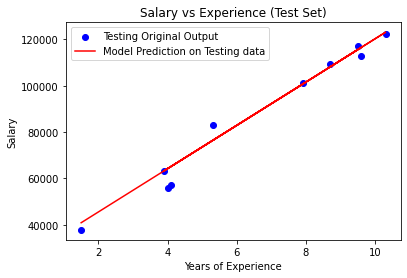

In [32]:
plt.scatter(x_test, y_test, color='blue', label='Testing Original Output')

plt.plot(x_test, lr.predict(x_test), color='red', label='Model Prediction on Testing data')

plt.title("Salary vs Experience (Test Set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend()
plt.show()

*The red line is the best fit line*


*If the years of Experience is 4, then the salary will be 60K, 10 Years = 120K,*

*Thus with the model salary can be determined based on experience*



The error is the distance of point (blue dot) to the red line



# **Calculating RESIDUALS (Errors)**

In [35]:
from sklearn import metrics

print("MAE: ", metrics.mean_absolute_error(y_test, y_pred))
print("MSE: ", metrics.mean_squared_error(y_test, y_pred))
print("RMSE: ", np.sqrt(metrics.mean_absolute_error(y_test, y_pred)))

MAE:  3426.4269374307078
MSE:  21026037.329511296
RMSE:  58.535689433291104


The RMSE value obtained is too less, hence the model is **Good Performing Model**

Root Mean Squared Error is the most common to find residuals